In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
caffe_root = './caffe/' 
sys.path.insert(0, caffe_root + 'python')
import caffe
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
%matplotlib inline

caffe.set_mode_cpu()

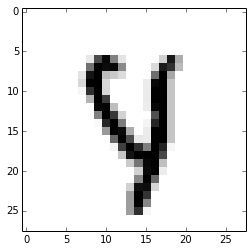

In [2]:
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

idx=25000

digit = np.array(X[idx].reshape(28, 28))
plt.imshow(digit, cmap = matplotlib.cm.binary,interpolation="nearest")

In [3]:
digit=digit[np.newaxis,np.newaxis,:,:]

In [4]:
model='./caffe/examples/mnist/lenet.prototxt'
pretrained='./caffe/examples/mnist/lenet_iter_10000.caffemodel'
net = caffe.Net(model, pretrained, caffe.TEST)
net.blobs['data'].data[0]=digit
output=net.forward()

In [5]:
print("predicted : {}\ntarget : {}").format(list(output["prob"][0]).index(1),int(y[idx]))

predicted : 4
target : 4
